## Heart Disease Analysis

### Overview

	In the current life style of humans, there frequent occurrence for the people to get affected with diseases. In which there are few diseases which are vital to the people which may cause to death. Heart disease is one them in which people has to take care of themselves and get check-up regularly. For the doctors to make treatment effectively and spend time with the diseased patient to diagnose them better so many test and observations have to be made. Predictive analysis helps the doctors to separate the patients with heart disease and without heart disease precisely with effective data analysis. The predictive analysis becomes decision maker in quickly segregating the patients with and without disease by simply analysing the test results of each patient records.
    The following dataset is a subset of heart disease data from Heart Disease Data Set of UCI from four different sources. Through this analysis, we are going to see What are the major attributes which gives explicit decision in predicting the heart disease and saves time for doctors to give affective treatments to the appropriate patients.

##### Importing required libraries

In [0]:
import numpy as np
import pandas as pd
import os

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# feature scaling
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import cross_val_score,GridSearchCV

## label encoding
from sklearn.preprocessing import LabelEncoder

## SMOTE technique
from imblearn.over_sampling import SMOTE

# To divide train and test set
from sklearn.model_selection import train_test_split

# To build the models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier


# To evaluate the models
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


### Attributes Description

1. age      : age of patient in years
2. sex      : gender of patient (male = 1, female = 0)
3. cp       : Type of chest pain (typical angina = 1,atypical angina = 2,non-anginal pain = 3,asymptomatic = 4)
4. trestbps : Blood pressure (in mm Hg) while resting on the day of admission in to hospital
5. chol     : measurement of cholesterol (mg/dl)
6. fbs      : fasting blood sugar(> 120 mg/dl) of patient (true = 1,false = 0)
7. restecg  : Results of resting electrocardiographic ( normal = 0, having ST-T wave abnormality = 1,
               showing probable or definite left ventricular hypertrophy by Estes' criteria = 2 )
8. thalach  : patient's maximum heart rate
9. exang    : patient's angina induced due to exercise (yes = 1 , no = 0)
10.oldpeak  : ST (position on ecg reports) depression induced by exercise relative to rest
11.slope    : the slope of the peak exercise ST segment (upsloping = 1,flat = 2,downsloping = 3)
12. ca      : number of major vessels (0-3) colored by flourosopy
13. thal    : Measure of blood disorder thalassemia (normal = 3 ,fixed defect =6 , reversable defect = 7)
14. target  : 0 for no heart disease and 1 for heart disease

##### Loading the dataset

In [0]:
data = pd.read_csv('/content/datasets_33180_43520_heart.csv')

In [0]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
print("Dimensions of Data")
print("Rows :",data.shape[0])
print("Columns :",data.shape[1])

Dimensions of Data
Rows : 303
Columns : 14


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Checking for null values

In [0]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Changing the datatypes of some of the attributes

In [0]:
for i in ['sex','cp','fbs','restecg','exang','slope','thal','target']:
    data[i] = data[i].astype('O')

#### Exploration of data

#### Basic Summary statistics

In [0]:
data.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


In [0]:
heart = data.copy()

### Exploratory Data Analysis

In [0]:
def patch(ax,total):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height*100)/total),ha="center")

In [0]:
heart['target'][heart['target']==1] = 'Yes'
heart['target'][heart['target']==0] = 'No'

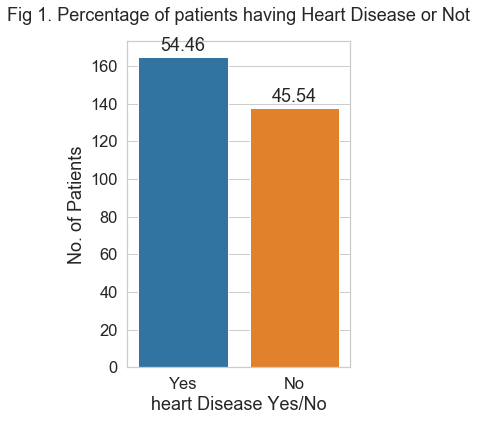

In [0]:
plt.figure(figsize = (4,6))
sns.set_style("whitegrid")
sns.set_context("notebook",font_scale=1.5)

ax = sns.countplot(heart['target']);
plt.xlabel("heart Disease Yes/No");
plt.ylabel("No. of Patients");

plt.title("Fig 1. Percentage of patients having Heart Disease or Not",pad = 20)
patch(ax,len(data))

In [0]:
bins = [25,30,40,50,60,100]
label = ['less than 30','30-40 Age','40-50 Age','50-60 age','More than 60 years']
heart['Age_group'] = pd.cut(heart['age'],bins=bins,labels=label)

posx and posy should be finite values
posx and posy should be finite values


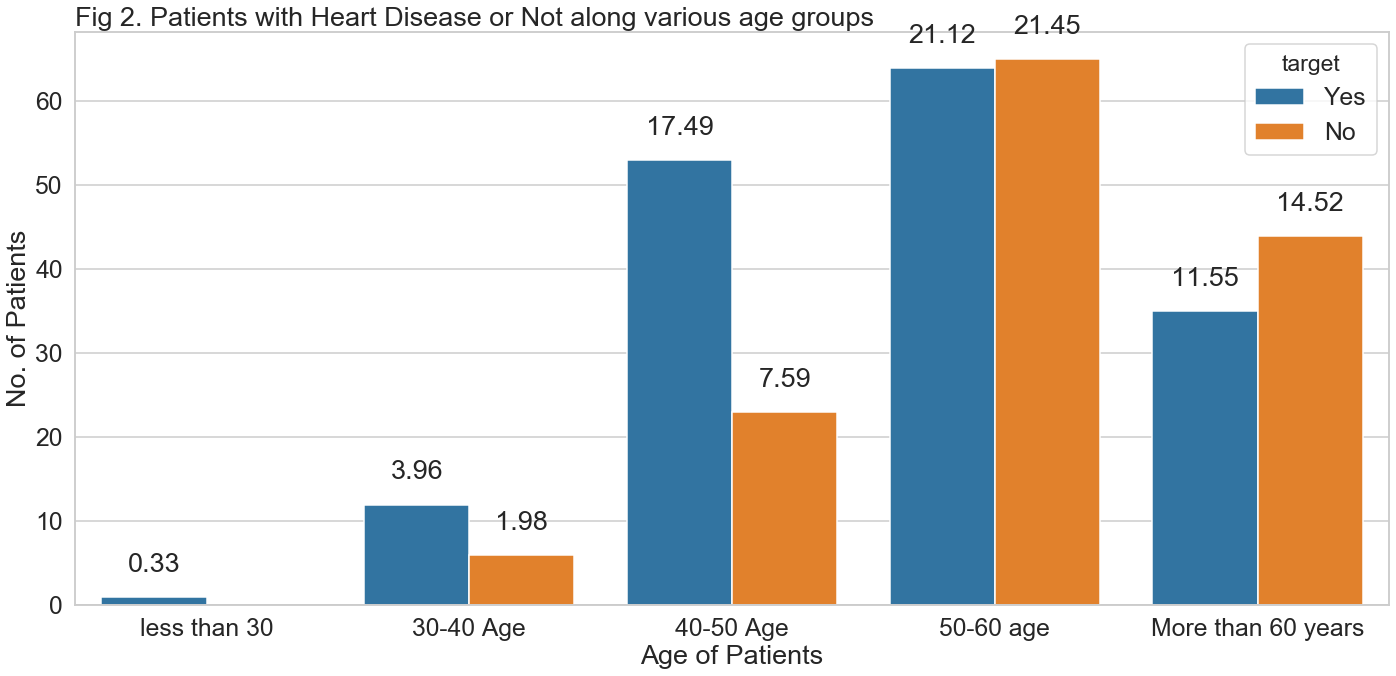

In [0]:
plt.figure(figsize = (20,10))
sns.set_style("whitegrid")
sns.set_context("talk",font_scale=1.5)

ax = sns.countplot(heart['Age_group'],hue=heart['target']);
plt.xlabel("Age of Patients");
plt.ylabel("No. of Patients");
plt.title("Fig 2. Patients with Heart Disease or Not along various age groups",loc='left')
patch(ax,len(heart));
plt.tight_layout()

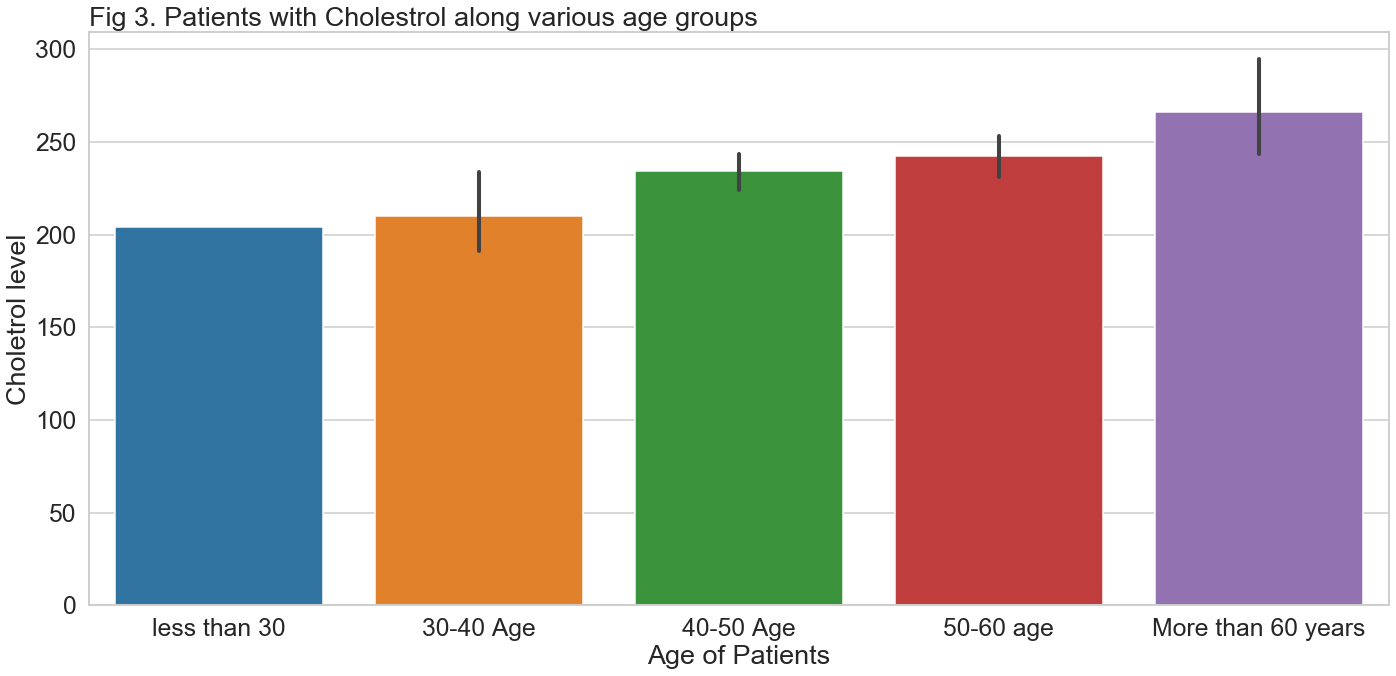

In [0]:
plt.figure(figsize = (20,10))
sns.set_style("whitegrid")
sns.set_context("talk",font_scale=1.5)

ax = sns.barplot(x = heart['Age_group'][heart['target']=='Yes'],y = heart['chol'][heart['target']=='Yes']);
plt.xlabel("Age of Patients");
plt.ylabel("Choletrol level");
plt.title("Fig 3. Patients with Cholestrol along various age groups",loc='left')
plt.tight_layout()

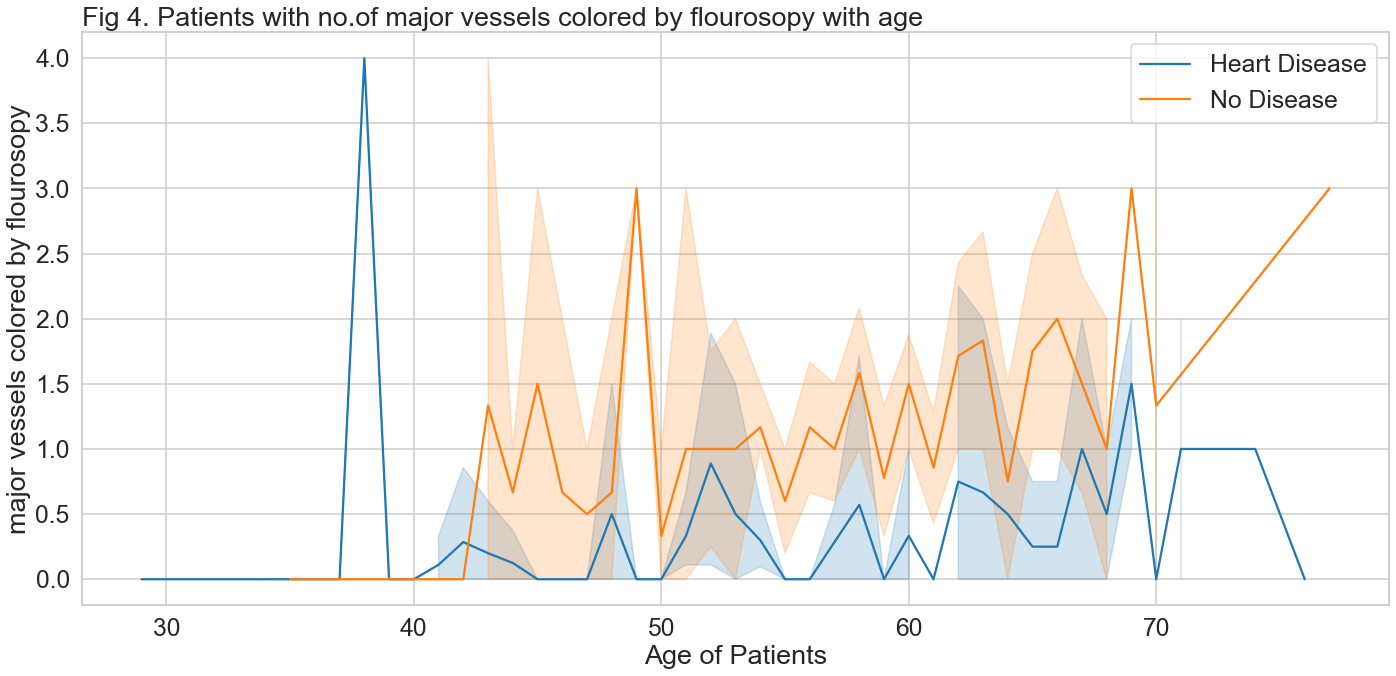

In [0]:
plt.figure(figsize = (20,10))
sns.set_style("whitegrid")
sns.set_context("talk",font_scale=1.5)

ax = sns.lineplot(x = heart['age'][heart['target']=='Yes'],y = heart['ca'][heart['target']=='Yes'],label = 'Heart Disease');
ax = sns.lineplot(x = heart['age'][heart['target']=='No'],y = heart['ca'][heart['target']=='No'],label= 'No Disease');
plt.xlabel("Age of Patients");
plt.ylabel("major vessels colored by flourosopy");
plt.title("Fig 4. Patients with no.of major vessels colored by flourosopy with age",loc='left')
plt.tight_layout()

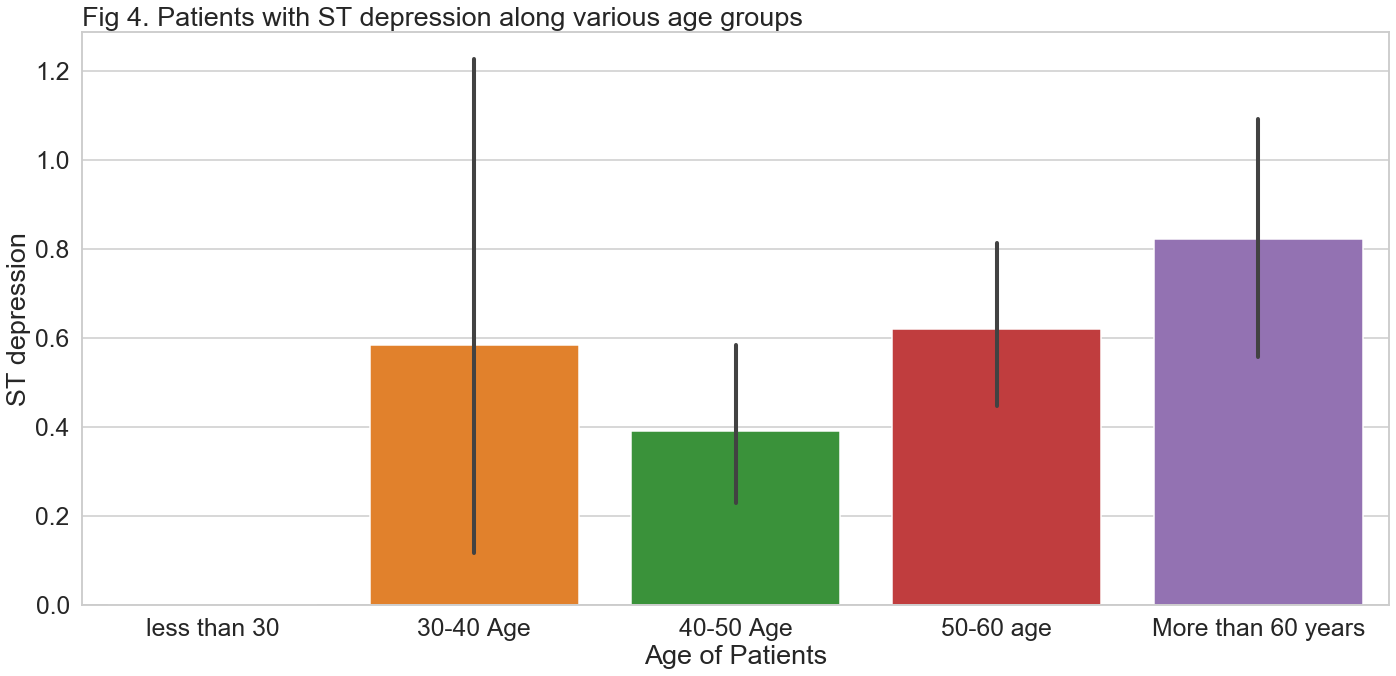

In [0]:
plt.figure(figsize = (20,10))
sns.set_style("whitegrid")
sns.set_context("talk",font_scale=1.5)

ax = sns.barplot(x = heart['Age_group'][heart['target']=='Yes'],y = heart['oldpeak'][heart['target']=='Yes']);
plt.xlabel("Age of Patients");
plt.ylabel("ST depression");
plt.title("Fig 4. Patients with ST depression along various age groups",loc='left')
plt.tight_layout()

In [0]:
heart['cp'][heart['cp']==0] = 'typical angina'
heart['cp'][heart['cp']==1] = 'atypical angina'
heart['cp'][heart['cp']==2] = 'non-anginal pain'
heart['cp'][heart['cp']==3] = 'asymptomatic'

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


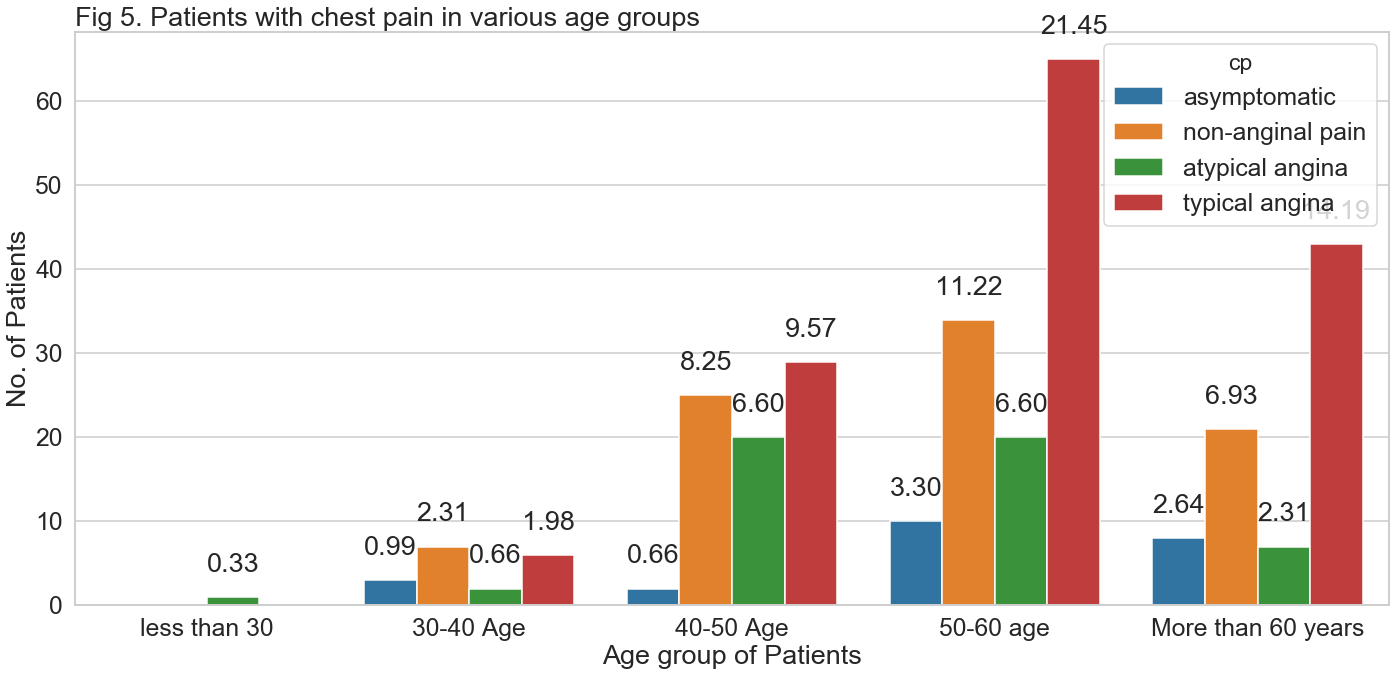

In [0]:
plt.figure(figsize = (20,10))
sns.set_style("whitegrid")
sns.set_context("talk",font_scale=1.5)

ax = sns.countplot(heart['Age_group'],hue=heart['cp']);
plt.xlabel("Age group of Patients");
plt.ylabel("No. of Patients");
plt.title("Fig 5. Patients with chest pain in various age groups",loc='left')
patch(ax,len(heart));
plt.tight_layout()

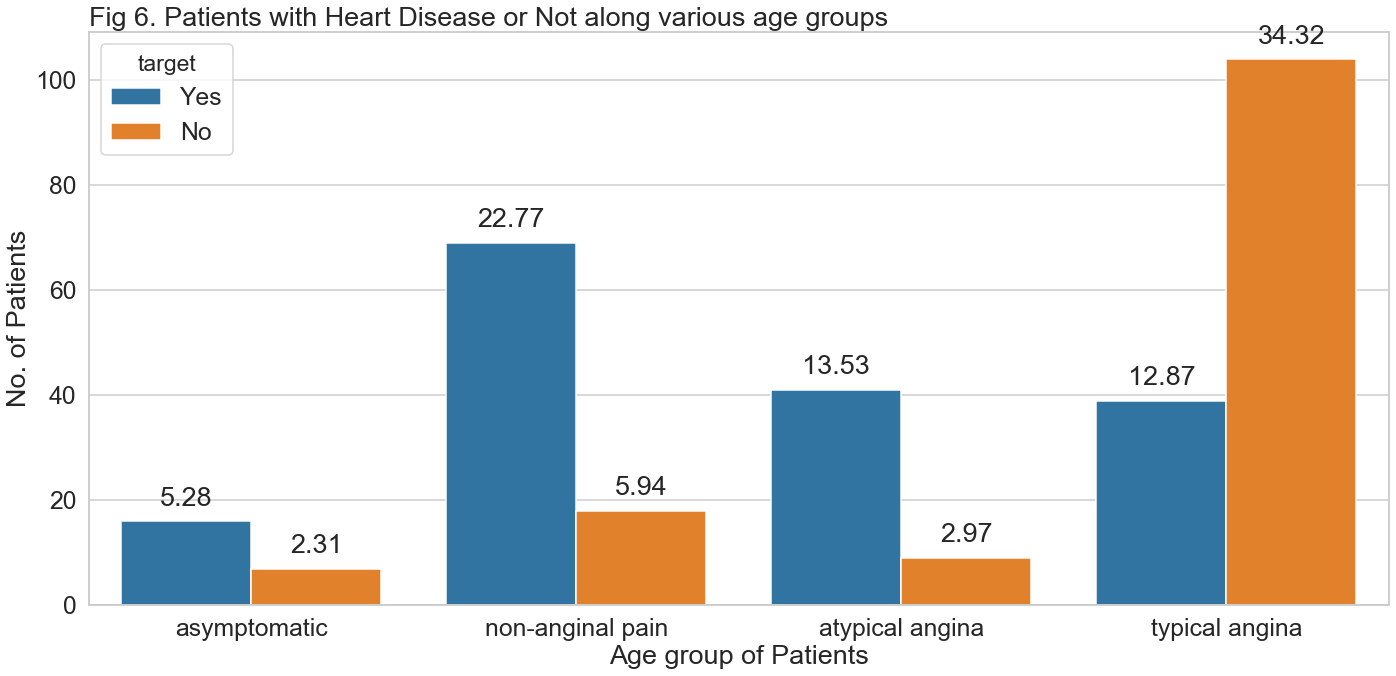

In [0]:
plt.figure(figsize = (20,10))
sns.set_style("whitegrid")
sns.set_context("talk",font_scale=1.5)

ax = sns.countplot(heart['cp'],hue=heart['target']);
plt.xlabel("Age group of Patients");
plt.ylabel("No. of Patients");
plt.title("Fig 6. Patients with Heart Disease or Not along various age groups",loc='left')
patch(ax,len(heart));
plt.tight_layout()

In [0]:
heart.groupby(['target'])["thalach"].mean()

target
No     139.101449
Yes    158.466667
Name: thalach, dtype: float64

#### Observations :

1. More disease patients are there in age group of 40-60 years.
2. Cholestrol level increases with increse in age.
3. No of major vessels coloured by flourosopy having heart disease are less compared to patients with no heart disease.
4. ST depression is more for people of age greater than 50 years.
5. Patients with age greater than 40 years ahving "typical-angina" type of chest pain.
6. patients with "non-anginal" type chest pain prone to have heart disease.

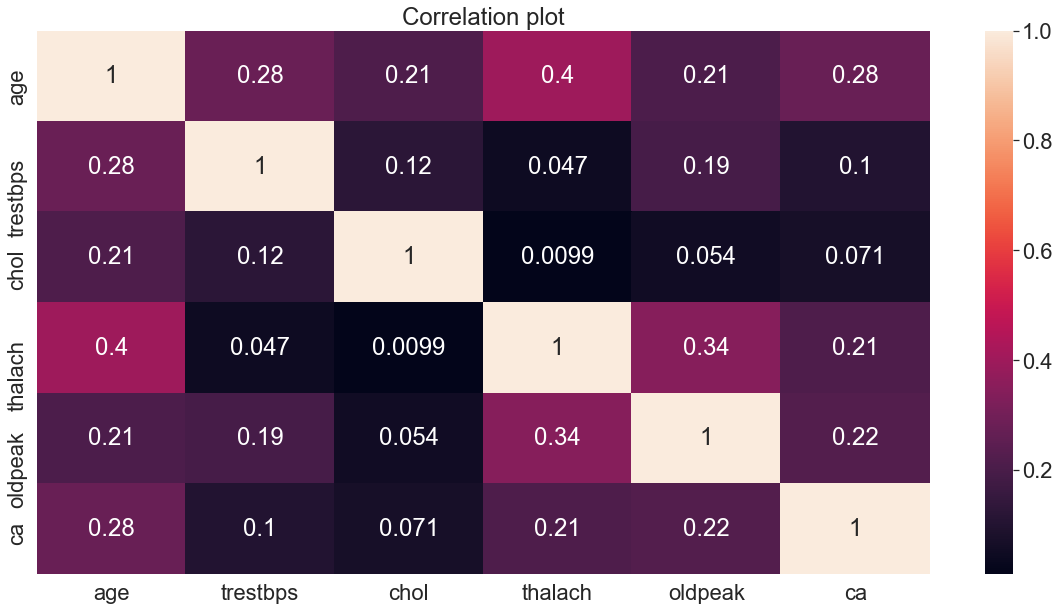

In [0]:
plt.figure(figsize=(20, 10))
sns.set_style("white")
sns.set_context("notebook",font_scale=2)
ax = sns.heatmap(data.corr().abs(),  annot=True);
ax.set_title("Correlation plot");

In [0]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Model Building and Evaluation

In [0]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
x = data.drop('target',axis=1)
y = data['target']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

In [0]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x_train)
x_scale_test = scale.fit_transform(x_test)

Accuracy for Train : 0.7216981132075472
Confusion Matrix for Train :


,Pred_yes,Pred_No
Act_Yes,60,34
Act_No,25,93


Accuracy for Test : 0.6923076923076923
Confusion Matrix for Test :


,Pred_yes,Pred_No
Act_Yes,26,18
Act_No,10,37


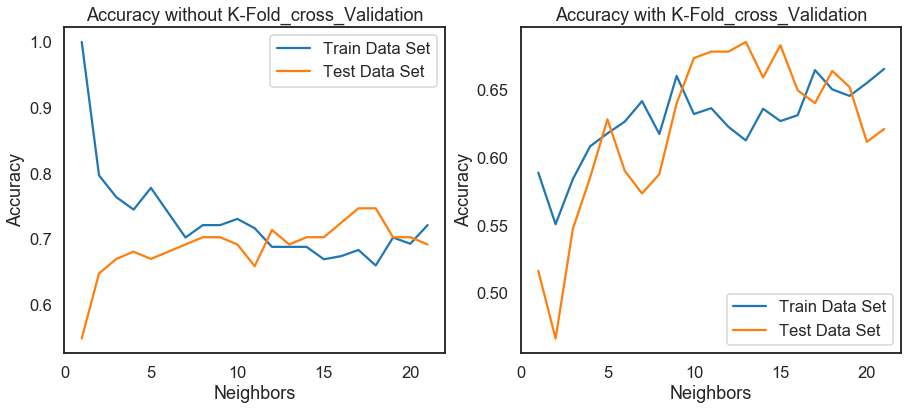

In [0]:
k_neighbors = range(1,22)
train_accuracy = []
test_accuracy = []
train_scores = []
test_scores = []
for n in k_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=n)
    model = KNN.fit(x_train,y_train)
    train_accuracy.append(model.score(x_train,y_train))
    test_accuracy.append(model.score(x_test,y_test))
    train_scores.append(cross_val_score(model, x_train, y_train, cv=21, scoring='accuracy').mean())
    test_scores.append(cross_val_score(model, x_test, y_test, cv=21, scoring='accuracy').mean())

plt.figure(figsize = (15,6))
sns.set_style("white");
sns.set_context("talk",font_scale=1);

plt.subplot(1,2,1)
ax = sns.lineplot(k_neighbors, train_accuracy,label="Train Data Set");
ax = sns.lineplot(k_neighbors, test_accuracy,label="Test Data Set");
ax.set(xlabel='Neighbors',ylabel = 'Accuracy');
ax.set_title("Accuracy without K-Fold_cross_Validation");

plt.subplot(1,2,2)
ax = sns.lineplot(k_neighbors, train_scores,label="Train Data Set");
ax = sns.lineplot(k_neighbors, test_scores,label="Test Data Set");
ax.set(xlabel='Neighbors',ylabel = 'Accuracy');
ax.set_title("Accuracy with K-Fold_cross_Validation");

y_pred_train = model.predict(x_train)
y_test_pred = model.predict(x_test)

confusion_train = pd.DataFrame(confusion_matrix(y_train,y_pred_train),columns=['Pred_yes','Pred_No'],index=['Act_Yes','Act_No'])
print("Accuracy for Train :",accuracy_score(y_train,y_pred_train))
print("Confusion Matrix for Train :")
display(confusion_train)

confusion_test = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['Pred_yes','Pred_No'],index=['Act_Yes','Act_No'])
print("Accuracy for Test :",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for Test :")
display(confusion_test)

Accuracy for Train : 0.5566037735849056
Confusion Matrix for Train :


,Pred_yes,Pred_No
Act_Yes,0,94
Act_No,0,118


Accuracy for Test : 0.5164835164835165
Confusion Matrix for Test :


,Pred_yes,Pred_No
Act_Yes,0,44
Act_No,0,47


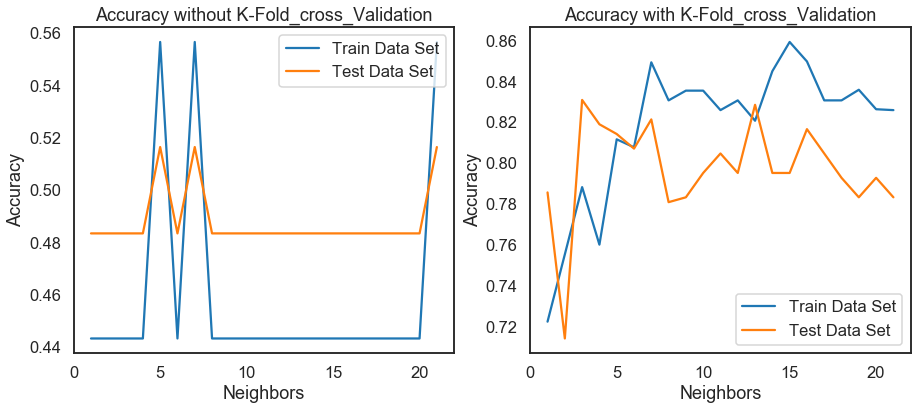

In [0]:
k_neighbors = range(1,22)
train_accuracy = []
test_accuracy = []
train_scores = []
test_scores = []
for n in k_neighbors:
    KNN = KNeighborsClassifier(n_neighbors=n)
    model = KNN.fit(x_train,y_train)
    train_accuracy.append(model.score(x_scaled,y_train))
    test_accuracy.append(model.score(x_scale_test,y_test))
    train_scores.append(cross_val_score(model, x_scaled, y_train, cv=21, scoring='accuracy').mean())
    test_scores.append(cross_val_score(model, x_scale_test, y_test, cv=21, scoring='accuracy').mean())

plt.figure(figsize = (15,6))
sns.set_style("white");
sns.set_context("talk",font_scale=1);

plt.subplot(1,2,1)
ax = sns.lineplot(k_neighbors, train_accuracy,label="Train Data Set");
ax = sns.lineplot(k_neighbors, test_accuracy,label="Test Data Set");
ax.set(xlabel='Neighbors',ylabel = 'Accuracy');
ax.set_title("Accuracy without K-Fold_cross_Validation");

plt.subplot(1,2,2)
ax = sns.lineplot(k_neighbors, train_scores,label="Train Data Set");
ax = sns.lineplot(k_neighbors, test_scores,label="Test Data Set");
ax.set(xlabel='Neighbors',ylabel = 'Accuracy');
ax.set_title("Accuracy with K-Fold_cross_Validation");

y_pred_train = model.predict(x_scaled)
y_test_pred = model.predict(x_scale_test)

confusion_train = pd.DataFrame(confusion_matrix(y_train,y_pred_train),columns=['Pred_yes','Pred_No'],index=['Act_Yes','Act_No'])
print("Accuracy for Train :",accuracy_score(y_train,y_pred_train))
print("Confusion Matrix for Train :")
display(confusion_train)

confusion_test = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['Pred_yes','Pred_No'],index=['Act_Yes','Act_No'])
print("Accuracy for Test :",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for Test :")
display(confusion_test)

### Decision Tree Classifier

In [0]:
Tree = DecisionTreeClassifier(max_depth=5,random_state=0)
model = Tree.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_scores.append(cross_val_score(model, x_train, y_train, cv=21, scoring='accuracy').mean())
test_scores.append(cross_val_score(model, x_test, y_test, cv=21, scoring='accuracy').mean())

confusion_train = pd.DataFrame(confusion_matrix(y_train,y_pred_train),columns=['Pred_yes','Pred_No'],index=['Act_Yes','Act_No'])
print("Accuracy for Train :",accuracy_score(y_train,y_pred_train))
print("Confusion Matrix for Train :")
display(confusion_train)

confusion_test = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['Pred_yes','Pred_No'],index=['Act_Yes','Act_No'])
print("Accuracy for Test :",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for Test :")
display(confusion_test)

Accuracy for Train : 0.9433962264150944
Confusion Matrix for Train :


,Pred_yes,Pred_No
Act_Yes,87,7
Act_No,5,113


Accuracy for Test : 0.7362637362637363
Confusion Matrix for Test :


,Pred_yes,Pred_No
Act_Yes,32,12
Act_No,12,35


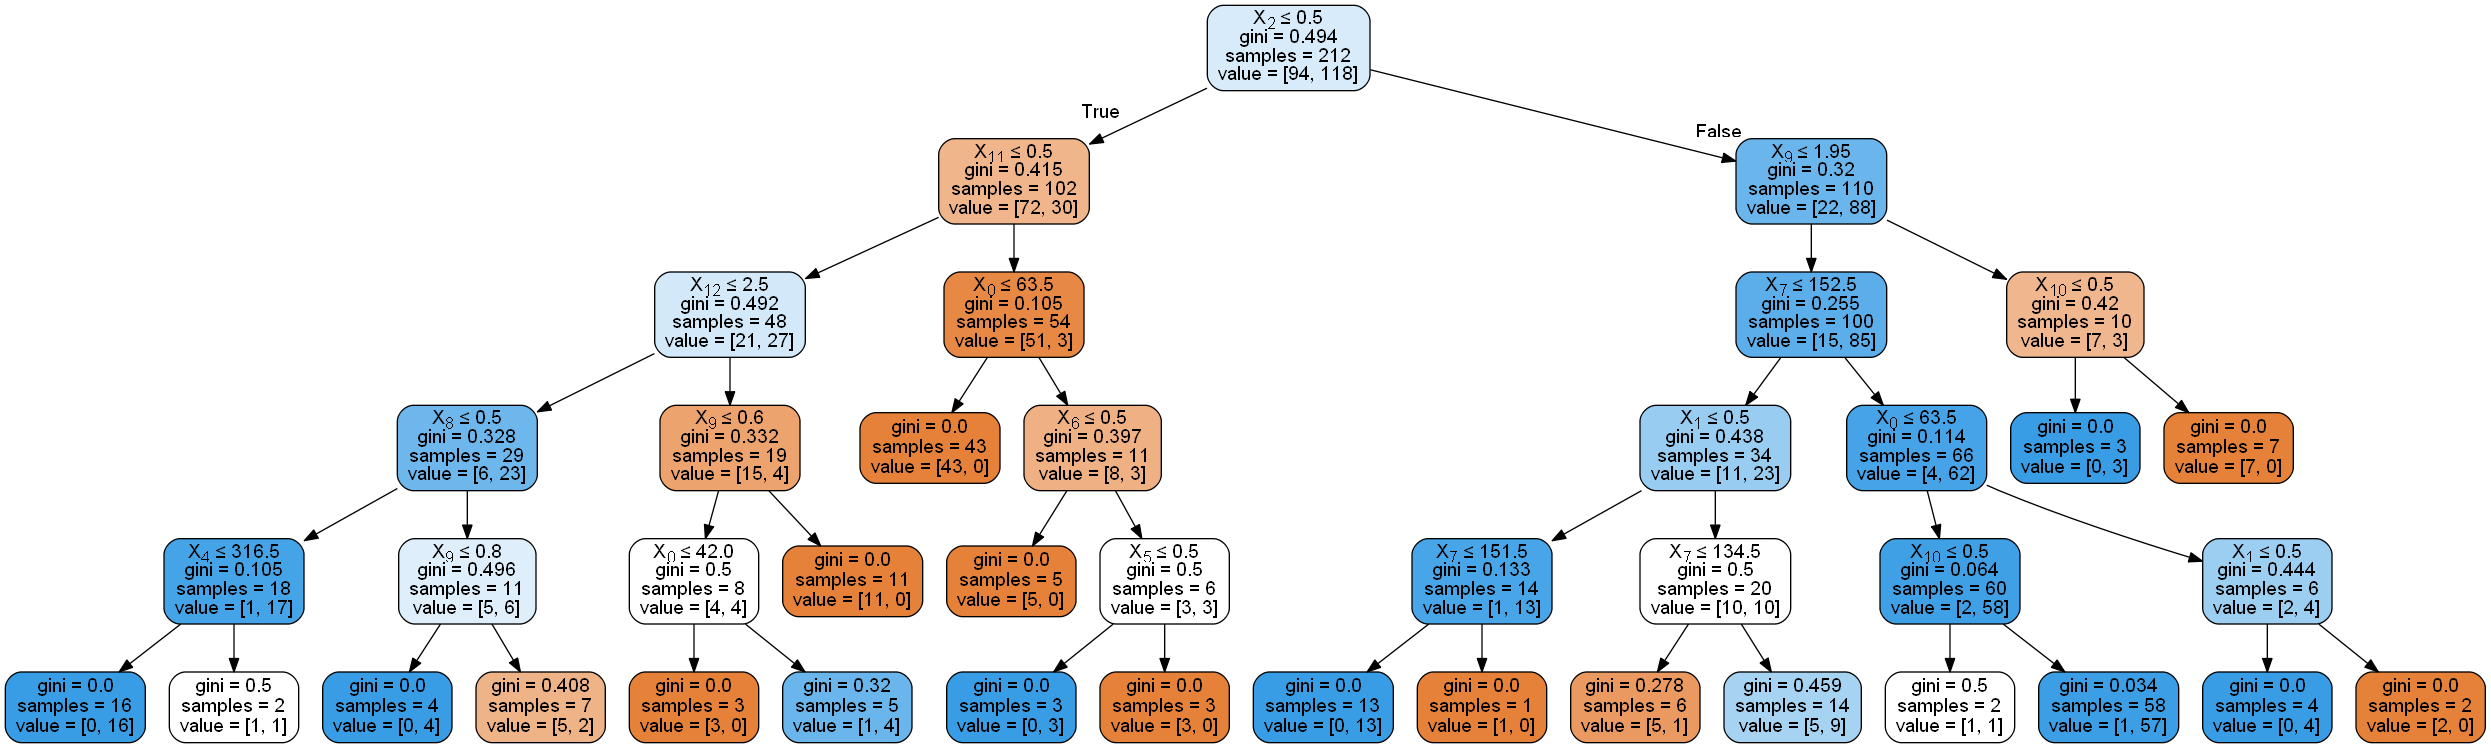

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
tree = StringIO()
export_graphviz(model, out_file=tree,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(tree.getvalue())  
Image(graph.create_png())

In [0]:
Tree = DecisionTreeClassifier(max_depth=5,random_state=0)
model = Tree.fit(x_scaled,y_train)
y_pred_train = model.predict(x_scaled)
y_test_pred = model.predict(x_scale_test)

train_scores.append(cross_val_score(model, x_scaled, y_train, cv=21, scoring='accuracy').mean())
test_scores.append(cross_val_score(model, x_scale_test, y_test, cv=21, scoring='accuracy').mean())

confusion_train = pd.DataFrame(confusion_matrix(y_train,y_pred_train),columns=['Pred_yes','Pred_No'],index=['Act_Yes','Act_No'])
print("Accuracy for Train :",accuracy_score(y_train,y_pred_train))
print("Confusion Matrix for Train :")
display(confusion_train)

confusion_test = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['Pred_yes','Pred_No'],index=['Act_Yes','Act_No'])
print("Accuracy for Test :",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for Test :")
display(confusion_test)

Accuracy for Train : 0.9433962264150944
Confusion Matrix for Train :


,Pred_yes,Pred_No
Act_Yes,87,7
Act_No,5,113


Accuracy for Test : 0.7252747252747253
Confusion Matrix for Test :


,Pred_yes,Pred_No
Act_Yes,33,11
Act_No,14,33


### Random Forest classifier

In [0]:
Tree = RandomForestClassifier(n_estimators = 50, max_depth = 5,random_state=0)
model = Tree.fit(x_train,y_train)
y_pred_train = model.predict(x_train)
y_test_pred = model.predict(x_test)

train_scores.append(cross_val_score(model, x_train, y_train, cv=21, scoring='accuracy').mean())
test_scores.append(cross_val_score(model, x_test, y_test, cv=21, scoring='accuracy').mean())

confusion_train = pd.DataFrame(confusion_matrix(y_train,y_pred_train),columns=['Pred_yes','Pred_No'],index=['Act_Yes','Act_No'])
print("Accuracy for Train :",accuracy_score(y_train,y_pred_train))
print("Confusion Matrix for Train :")
display(confusion_train)

confusion_test = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['Pred_yes','Pred_No'],index=['Act_Yes','Act_No'])
print("Accuracy for Test :",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for Test :")
display(confusion_test)

Accuracy for Train : 0.9433962264150944
Confusion Matrix for Train :


,Pred_yes,Pred_No
Act_Yes,85,9
Act_No,3,115


Accuracy for Test : 0.8241758241758241
Confusion Matrix for Test :


,Pred_yes,Pred_No
Act_Yes,32,12
Act_No,4,43


In [0]:
Tree = RandomForestClassifier(n_estimators = 50, max_depth = 5,random_state=0)
model = Tree.fit(x_scaled,y_train)
y_pred_train = model.predict(x_scaled)
y_test_pred = model.predict(x_scale_test)

train_scores.append(cross_val_score(model, x_scaled, y_train, cv=21, scoring='accuracy').mean())
test_scores.append(cross_val_score(model, x_scale_test, y_test, cv=21, scoring='accuracy').mean())

confusion_train = pd.DataFrame(confusion_matrix(y_train,y_pred_train),columns=['Pred_yes','Pred_No'],index=['Act_Yes','Act_No'])
print("Accuracy for Train :",accuracy_score(y_train,y_pred_train))
print("Confusion Matrix for Train :")
display(confusion_train)

confusion_test = pd.DataFrame(confusion_matrix(y_test,y_test_pred),columns=['Pred_yes','Pred_No'],index=['Act_Yes','Act_No'])
print("Accuracy for Test :",accuracy_score(y_test,y_test_pred))
print("Confusion Matrix for Test :")
display(confusion_test)

Accuracy for Train : 0.9433962264150944
Confusion Matrix for Train :


,Pred_yes,Pred_No
Act_Yes,85,9
Act_No,3,115


Accuracy for Test : 0.8241758241758241
Confusion Matrix for Test :


,Pred_yes,Pred_No
Act_Yes,32,12
Act_No,4,43


In [0]:
Feature_importance = pd.DataFrame({"Features":x.columns,"Importance":model.feature_importances_})
Feature_importance.sort_values(by=['Importance'],ascending=False,inplace=True)

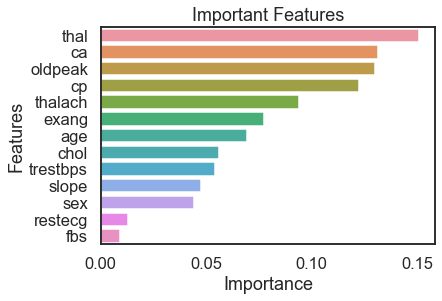

In [0]:
ax = sns.barplot(x='Importance',y='Features',data = Feature_importance);
ax.set_title("Important Features");

### Conclusion :

From the above analysis, it clearly shows us that patients with blood disorder thalassemia majorly prone to the have heart disease and no of major blood vessels, St depression and maximum heart rate also effecting the patient to prone for heart disease. 
Usual misconception is with age and cholesterol level increase people think they may get heart disease, but dataset clearly shows there are other factors as well causing the heart disease. 
I have used a simple tree-based model to predict the major cause for heart disease and the accuracy were quite good for test set as well its nearly 94.33% for train and 82.41% for test.